<small>This notebook was prepared by [Nicole Donnelly](mailto:nicole.donnelly@dc.gov) for the DC area regional Women in Data Science Conference [(DCMDVAWiDSRegional)](https://sites.google.com/view/dcmdvawidsregional/agenda?authuser=0) on March 5,2018 and presented as a one hour workshop. The original github repo is available [here](https://github.com/nd1/WiDS2018)

This workshop has been created in [Jupyter Notebook](http://jupyter.org/) with [Python 3.6](https://www.python.org/downloads/release/python-360/). If you are unfamiliar with how to use a Jupyter notebook, consult [this tutorial](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/).

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/nd1/WiDS2018/master)
You can also run this notebook on [Binder](https://mybinder.org/) by clicking the image above. Binder allows you to run the notebook without installing anything on your system.
</small>

## <center>Intro to Python for Data Science with DC OpenData</center>

![dc flag](./images/4994-004-096A5339.jpg)

### Introduction
As cities embrace the [open data](https://en.wikipedia.org/wiki/Open_data) movement (you can find links to datasets for 85 cities [here](https://www.forbes.com/sites/metabrown/2017/06/30/quick-links-to-municipal-open-data-portals-for-85-us-cities/#290b91072290)), data scientist have an ever expanding population of data available to analyze and incorporate into other projects. As with any data source, unless you are designing and collecting it yourself, you will likely need to do some data wrangling before moving on to exploratory data analysis (EDA) and machine learning. 

During the course of this workshop, we will look at using [Python](https://www.python.org/) to wrangle [open data available from the Government of the District of Columbia](http://opendata.dc.gov/) in preparation for machine learning (this workshop will not cover machine learning). We will also look at some initial EDA via visualizations once we build a data set we want to use.

### Overview
If you do not have particular project in mind, I encourage you to [browse through the available data sets](http://opendata.dc.gov/datasets) (951 as of the time this workshop was created). We are going to start today with the [Computer Assisted Mass Appraisal - Condominium](http://opendata.dc.gov/datasets/computer-assisted-mass-appraisal-condominium) data. There is a lot that can be done with this data, particularly in conjunction with other data available from DC ([tax data](http://opendata.dc.gov/datasets/integrated-tax-system-public-extract), [crime data](http://opendata.dc.gov/datasets?q=crime), [construction data](http://opendata.dc.gov/datasets?q=construction), or [city service requests](http://opendata.dc.gov/datasets?q=311) for example) or other sources like the [United States Census Bureau](https://www.census.gov/data.html) if you are interested in expanding on the dataset built here.

Buying a house in DC can be a daunting task. Inventory was described in November 2017 as ["dismally low"](https://www.washingtonpost.com/news/where-we-live/wp/2017/11/14/buyers-are-gaining-more-leverage-in-the-hot-d-c-area-housing-market/?utm_term=.b1aa57960214). But maybe armed with some appraisal data and machine learning, we can understand condominium values a little better. For example, maybe we could create a simple application to determine appraisal value, similar to [this example](https://github.com/georgetown-analytics/machine-learning/blob/master/examples/bbengfort/home%20sales/home_sales.ipynb) which uses housing sales data.

### Data

Here is [some information](https://www.arcgis.com/sharing/rest/content/items/d6c70978daa8461992658b69dccb3dbf/info/metadata/metadata.xml?format=default&output=html) available to us about the data.

**Abstract**: Computer Assisted Mass Appraisal (CAMA) database. The dataset contains attribution on housing characteristics for commercial properties, and was created as part of the DC Geographic Information System (DC GIS) for the D.C. Office of the Chief Technology Officer (OCTO) and participating D.C. government agencies. All DC GIS data is stored and exported in Maryland State Plane coordinates NAD 83 meters. 

METADATA CONTENT IS IN PROCESS OF VALIDATION AND SUBJECT TO CHANGE.

**Purpose**: This data is used for the planning and management of Washington, D.C. by local government agencies.

**Supplemental Information**: Most lots have one building in the cama file, assigned BLDG_NUM of one in the table. For parcels where multiple buildings exist, the primary building (such as the main residence) is assigned BLDG_NUM = 1. The other buildings or structures have BLDG_NUM values in random sequential order. After the primary structure, there is no way to associate BLDG_NUM > 2 records with any particular structure on the lot.



There is also some attribute information available. Some of it has been copied here. Not all of it is overly descriptive. 


***Entity and Attribute Information***:


**Attribute Label**: SALEDATE

**Attribute**:


**Attribute Label**: Sale_Num

**Attribute Definition**: sale number


**Attribute Label**: EYB

**Attribute Definition:** The calculated or apparent year, that an improvement was built that is most often more recent than actual year built.


**Attribute Label**: Shape

**Attribute Definition**: Feature geometry.


**Attribute Label**: OWNERNAME

**Attribute Definition**: property owner name


**Attribute Label**: SSL

**Attribute Definition**: square suffix and lot


**Attribute Label**: Extwall_D

**Attribute Definition**: exterior wall description


**Attribute Label**: PRICE

**Attribute**:


**Attribute Label**: Yr_Rmdl

**Attribute Definition**: year structure was remodeled


**Attribute Label**: Saledate

**Attribute Definition**: date of last sale


**Attribute Label**: AYB

**Attribute Definition**: The earliest time the main portion of the building was built. It is not affected by subsequent construction.


**Attribute Label**: Price

**Attribute Definition**: price of last sale


**Attribute Label**: GBA

**Attribute Definition**: gross building area in square feet


### Tools

This workshop has been created in [Jupyter Notebook](http://jupyter.org/) with [Python 3.6](https://www.python.org/downloads/release/python-360/). If you are unfamiliar with how to use a Jupyter notebook, consult [this tutorial](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/).

A popular package for working with data in python is [pandas](https://pandas.pydata.org/pandas-docs/stable/).

From the above link:

"**pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, **real world** data analysis in Python. Additionally, it has the broader goal of becoming **the most powerful and flexible open source data analysis / manipulation tool available in any language**. It is already well on its way toward this goal.

pandas is well suited for many different kinds of data:

* Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure"

We will also use [Seaborn](https://seaborn.pydata.org/) which is a visualization package built on [matplotlib](https://matplotlib.org/), a 2D plotting library in python. [openpyxl](https://pypi.python.org/pypi/openpyxl) is used to assist with writing files to an excel format for an optional part of the work below.

The following libraries, which are part of standard python, are also used:

* [os](https://docs.python.org/3/library/os.html)
* [urllib](https://docs.python.org/3/library/urllib.html)

After importing the packages and libraries needed, I am also setting two options that will assist in this exercise. `pd.options.display.max_columns = 35` is a pandas option that controls the number of columns displayed in a dataframe. Here we override the default and display 35. `%matplotlib inline` tells the notebook to display our plots in the notebook instead of in an external window.


In [1]:
import os
import urllib
import openpyxl

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 35
%matplotlib inline

### Data Wrangling

Now we are ready to get our data. Storing the original files is always good practice so you can go back to the original data if needed. Below you will find a short python function to download data to a data directory. This way, if you decide to download more data later, you can set the information particular to that data as variables and re-use this function.

In [3]:
# create a default data directory. Since we are using os, this convention will work on both Windows and
# *nix based environments
DATA_DIR = "./data"

# the two variables below are the url of our dataset on the opendata site and the path/name for the file
#we are downloading
cama_url = "https://opendata.arcgis.com/datasets/d6c70978daa8461992658b69dccb3dbf_24.csv"
cama_file = os.path.join(DATA_DIR, "cama-condo.csv")

In [4]:
# the get_data function takes 3 variables - our data directory (dname), the url of our data (furl) and 
# the path/name for our file (fname)

def get_data(dname, furl, fname):
    
    # check to see if the data directory exists. if not, create it and print the message
    if not os.path.exists(dname):
        print("making directory")
        os.makedirs(dname)
    # if the data directory exists, just print the message
    else:
        print("directory exists")
        
    # check to see if the file exists. if not, download the file and print the message
    if not os.path.isfile(fname):
        print("downloading file")
        urllib.request.urlretrieve(furl, fname)
    
    # if the file exists, print the message (if you cloned the github repo, all the data is included)
    else:
        print("file exists")

Use the get_data function to download and save Computer Assisted Mass Appraisal - Condominium.

In [5]:
get_data(DATA_DIR, cama_url, cama_file)

directory exists
file exists


We are now going to use pandas to read the downloaded csv file into a dataframe called "df". There are a lot of options you can use when creating a dataframe. Take a look at the [documenation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [6]:
df = pd.read_csv(cama_file)

We can use "head" to see the head, or first 5 rows of the data. If you want to see more than 5, put the number of rows you would like to see more rows, put the number you want inside the parenthesis.

In [7]:
df.head()

,OBJECTID,SSL,BLDG_NUM,CMPLX_NUM,AYB,YR_RMDL,EYB,ROOMS,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,LIVING_GBA,USECODE,LANDAREA,GIS_LAST_MOD_DTTM
0,3001,5763 2009,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11T00:00:00.000Z,145000.0,Q,1,715,16,1185,2018-02-25T18:02:24.000Z
1,3002,5763 2010,1,1481,1965,NaN,2002,2.0,0.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2015-09-28T00:00:00.000Z,0.0,U,3,404,16,593,2018-02-25T18:02:24.000Z
2,3003,5763 2011,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16T00:00:00.000Z,126000.0,Q,1,688,16,988,2018-02-25T18:02:24.000Z
3,3004,5763 2012,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21T00:00:00.000Z,80995.0,Q,1,698,16,1087,2018-02-25T18:02:24.000Z
4,3005,5763 2013,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-04-26T00:00:00.000Z,107500.0,Q,1,612,16,889,2018-02-25T18:02:24.000Z


In [8]:
df.head(8)

,OBJECTID,SSL,BLDG_NUM,CMPLX_NUM,AYB,YR_RMDL,EYB,ROOMS,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,LIVING_GBA,USECODE,LANDAREA,GIS_LAST_MOD_DTTM
0,3001,5763 2009,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11T00:00:00.000Z,145000.0,Q,1,715,16,1185,2018-02-25T18:02:24.000Z
1,3002,5763 2010,1,1481,1965,NaN,2002,2.0,0.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2015-09-28T00:00:00.000Z,0.0,U,3,404,16,593,2018-02-25T18:02:24.000Z
2,3003,5763 2011,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16T00:00:00.000Z,126000.0,Q,1,688,16,988,2018-02-25T18:02:24.000Z
3,3004,5763 2012,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21T00:00:00.000Z,80995.0,Q,1,698,16,1087,2018-02-25T18:02:24.000Z
4,3005,5763 2013,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-04-26T00:00:00.000Z,107500.0,Q,1,612,16,889,2018-02-25T18:02:24.000Z
5,3006,5763 2014,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2017-03-27T00:00:00.000Z,54900.0,U,5,578,16,790,2018-02-25T18:02:24.000Z
6,3007,5763 2015,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-08-20T00:00:00.000Z,65995.0,Q,1,578,16,790,2018-02-25T18:02:24.000Z
7,3008,5763 2016,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-15T00:00:00.000Z,62995.0,Q,1,578,16,790,2018-02-25T18:02:24.000Z


Shape will tell us the shape -- number of rows and columns -- in our dataset. Columns will give us a list of column names.

In [9]:
df.shape

(52954, 23)

In [10]:
df.columns

Index(['OBJECTID', 'SSL', 'BLDG_NUM', 'CMPLX_NUM', 'AYB', 'YR_RMDL', 'EYB',
       'ROOMS', 'BEDRM', 'BATHRM', 'HF_BATHRM', 'HEAT', 'HEAT_D', 'AC',
       'FIREPLACES', 'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM',
       'LIVING_GBA', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM'],
      dtype='object')

Info will give us even more info. Take a few minutes to review the information.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52954 entries, 0 to 52953
Data columns (total 23 columns):
OBJECTID             52954 non-null int64
SSL                  52954 non-null object
BLDG_NUM             52954 non-null int64
CMPLX_NUM            52954 non-null int64
AYB                  52954 non-null int64
YR_RMDL              31686 non-null float64
EYB                  52954 non-null int64
ROOMS                52308 non-null float64
BEDRM                52323 non-null float64
BATHRM               52323 non-null float64
HF_BATHRM            52085 non-null float64
HEAT                 52321 non-null float64
HEAT_D               52321 non-null object
AC                   52322 non-null object
FIREPLACES           52160 non-null float64
SALEDATE             52954 non-null object
PRICE                48934 non-null float64
QUALIFIED            52953 non-null object
SALE_NUM             52954 non-null int64
LIVING_GBA           52954 non-null int64
USECODE              52954 non

Now that we have data, let's start wrangling it in to something useful to us. If we use the idea mentioned above to create a simple application that uses machine learning to determine the appraisal value of a condominium in order to assist with the daunting task of purchasing in DC, we might want to start wrangling the dataset into something we can use to perform a [regression analysis](https://en.wikipedia.org/wiki/Regression_analysis). With this in mind, we will need data that contains numerical variables and we will also want to look at the correlations among these variables.

To add some additional information to help us work through the data, let's say our hypothetical buyer has decided they are only interested in condos with at least 2 bedrooms. Additionally, they would like to live in [Ward 6](https://planning.dc.gov/page/about-ward-6). The land area isn't really important to them.

Let's start by dropping some items we won't need. OBJECTID is a unique idea in the data and is not going to be useful in our regression. We don't have good information in our metadata on what QUALIFIED or USECODE are. We hadve decided LANDAREA is not important. GIS_LAST_MOD_DTTM is a modification date for the data, so also not relevant here. 

We use drop to drop columns in pandas. The axis variable of 1 specifies columns. "inplace" tells pandas we want to drop the columns from our actual dataframe. Without it, pandas will return a temporary dataframe object that excludes those columns. Again, the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) will explain the options available for the command.

In [12]:
df.drop(['OBJECTID', 'QUALIFIED', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM'], axis=1, inplace=True)

SALEDATE is probably something we want to hold on to. But as info showed us, the data is an object, not a date/time. Let's convert it to something more useable.

In [13]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'], errors='coerce')

Let's see what our data looks like now.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52954 entries, 0 to 52953
Data columns (total 18 columns):
SSL           52954 non-null object
BLDG_NUM      52954 non-null int64
CMPLX_NUM     52954 non-null int64
AYB           52954 non-null int64
YR_RMDL       31686 non-null float64
EYB           52954 non-null int64
ROOMS         52308 non-null float64
BEDRM         52323 non-null float64
BATHRM        52323 non-null float64
HF_BATHRM     52085 non-null float64
HEAT          52321 non-null float64
HEAT_D        52321 non-null object
AC            52322 non-null object
FIREPLACES    52160 non-null float64
SALEDATE      52953 non-null datetime64[ns]
PRICE         48934 non-null float64
SALE_NUM      52954 non-null int64
LIVING_GBA    52954 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(6), object(3)
memory usage: 7.3+ MB


The number after the column name tells us the number of non-null values. It looks like we don't have a price for everything. PRICE has 48,934 non-null values while our data has 52,954 objects. An object isn't going to be useful to us without a price and we don't really have an easy way to figure out what that missing price should be. So let's drop those items from the data.

In [15]:
df = df[df.PRICE.notnull()]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48934 entries, 0 to 52953
Data columns (total 18 columns):
SSL           48934 non-null object
BLDG_NUM      48934 non-null int64
CMPLX_NUM     48934 non-null int64
AYB           48934 non-null int64
YR_RMDL       29386 non-null float64
EYB           48934 non-null int64
ROOMS         48289 non-null float64
BEDRM         48303 non-null float64
BATHRM        48303 non-null float64
HF_BATHRM     48067 non-null float64
HEAT          48302 non-null float64
HEAT_D        48302 non-null object
AC            48302 non-null object
FIREPLACES    48144 non-null float64
SALEDATE      48933 non-null datetime64[ns]
PRICE         48934 non-null float64
SALE_NUM      48934 non-null int64
LIVING_GBA    48934 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(6), object(3)
memory usage: 7.1+ MB


We still have some missing values. Our hypothetical buyer wants to buy something with at least 2 bedrooms so next let's drop condos with less than 2 bedrooms from our data. We can do this by subsetting our dataframe to only items where the value in BEDRM >= 2. We then assign that to a variable we can call. By re-using our variable df, we are overwriting the data we are already referencing it with.

In [17]:
df = df[df.BEDRM >= 2.0]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21603 entries, 0 to 52953
Data columns (total 18 columns):
SSL           21603 non-null object
BLDG_NUM      21603 non-null int64
CMPLX_NUM     21603 non-null int64
AYB           21603 non-null int64
YR_RMDL       12197 non-null float64
EYB           21603 non-null int64
ROOMS         21592 non-null float64
BEDRM         21603 non-null float64
BATHRM        21603 non-null float64
HF_BATHRM     21558 non-null float64
HEAT          21602 non-null float64
HEAT_D        21602 non-null object
AC            21602 non-null object
FIREPLACES    21524 non-null float64
SALEDATE      21603 non-null datetime64[ns]
PRICE         21603 non-null float64
SALE_NUM      21603 non-null int64
LIVING_GBA    21603 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(6), object(3)
memory usage: 3.1+ MB


Next let's look at the column YR_RMDL. There are also a lot of null values and we have no meaningful way to impute them. Let's drop this column.

Our buyer isn't really concerned with the overall number of rooms as long as the condo has 2 bedrooms so we can drop that column as well. 

In [19]:
df.drop(['YR_RMDL', 'ROOMS'], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21603 entries, 0 to 52953
Data columns (total 16 columns):
SSL           21603 non-null object
BLDG_NUM      21603 non-null int64
CMPLX_NUM     21603 non-null int64
AYB           21603 non-null int64
EYB           21603 non-null int64
BEDRM         21603 non-null float64
BATHRM        21603 non-null float64
HF_BATHRM     21558 non-null float64
HEAT          21602 non-null float64
HEAT_D        21602 non-null object
AC            21602 non-null object
FIREPLACES    21524 non-null float64
SALEDATE      21603 non-null datetime64[ns]
PRICE         21603 non-null float64
SALE_NUM      21603 non-null int64
LIVING_GBA    21603 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(6), object(3)
memory usage: 2.8+ MB


HF_BATHRM and FIREPLACES also contain null values. However, instead of dropping those columns, let's assume a null value is equivalent to 0. We can use fillna to change all our null values to 0. We can address HEAT and HEAT_D later if we decide to use those in our regression.

In [21]:
df.fillna(0, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21603 entries, 0 to 52953
Data columns (total 16 columns):
SSL           21603 non-null object
BLDG_NUM      21603 non-null int64
CMPLX_NUM     21603 non-null int64
AYB           21603 non-null int64
EYB           21603 non-null int64
BEDRM         21603 non-null float64
BATHRM        21603 non-null float64
HF_BATHRM     21603 non-null float64
HEAT          21603 non-null float64
HEAT_D        21603 non-null object
AC            21603 non-null object
FIREPLACES    21603 non-null float64
SALEDATE      21603 non-null datetime64[ns]
PRICE         21603 non-null float64
SALE_NUM      21603 non-null int64
LIVING_GBA    21603 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(6), object(3)
memory usage: 2.8+ MB


Our buyer wants to live in Ward 6. How can we figure out which of the condos are located there? SSL (square suffix and lot) actually gives us a key to do that. We can determine the address from SSL. Once we have the address, we can get additional useful information including Ward. 

Let's start with the address.

[Address Residential Units](http://opendata.dc.gov/datasets/address-residential-units): This table contains residential units and attributes of Address points, created as part of the Master Address Repository (MAR) for the D.C. Residential units can be condominiums or also apartments. Office of the Chief Technology Officer (OCTO) and DC Department of Consumer and Regulatory Affairs . It contains the addresses in the District of Columbia which are typically placed on the buildings. More information on the MAR can be found at http://dcgis.dc.gov.

We can download this data using our get_data function then read it into a dataframe, just like with our CAMA data.

In [23]:
aru_url = "https://opendata.arcgis.com/datasets/c3c0ae91dca54c5d9ce56962fa0dd645_68.csv"
aru_file = os.path.join(DATA_DIR, "address_residential_unit.csv")

In [24]:
get_data(DATA_DIR, aru_url, aru_file)

directory exists
file exists


In [25]:
aru_df = pd.read_csv(aru_file)

In [26]:
aru_df.head()

,OBJECTID,UNIT_ID,ADDRESS_ID,FULLADDRESS,SSL,STATUS,UNITNUM,UNITTYPE,METADATA_ID
0,1,1271,145743,2017 37TH STREET SE,5671 2022,ACTIVE,102,CONDO,316669
1,2,1272,145743,2017 37TH STREET SE,5671 2023,ACTIVE,201,CONDO,316670
2,3,1273,145743,2017 37TH STREET SE,5671 2024,ACTIVE,202,CONDO,316671
3,4,1274,145743,2017 37TH STREET SE,5671 2025,ACTIVE,301,CONDO,316672
4,5,1275,145743,2017 37TH STREET SE,5671 2026,ACTIVE,302,CONDO,316673


In [27]:
aru_df.shape

(235494, 9)

In [28]:
aru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235494 entries, 0 to 235493
Data columns (total 9 columns):
OBJECTID       235494 non-null int64
UNIT_ID        235494 non-null int64
ADDRESS_ID     235494 non-null int64
FULLADDRESS    229822 non-null object
SSL            55718 non-null object
STATUS         235494 non-null object
UNITNUM        235494 non-null object
UNITTYPE       235494 non-null object
METADATA_ID    235494 non-null int64
dtypes: int64(4), object(5)
memory usage: 16.2+ MB


SSL is common to both our datasets. Unfortunately, we seem to have a lot of null values in SSL in the address data. How many matches do we have between the two? There is a way to easily check that.

In [29]:
df['SSL'].isin(aru_df['SSL']).value_counts()

True     19591
False     2012
Name: SSL, dtype: int64

pandas gives us a way to connect dataframes with merge. Here we are creating a third dataframe, condos, by merging our initial dataframe, df, with our address dataframe, aru_df. We also tell pandas that SSL is the common information between the two dataframes. By default, pandas performs an [inner join](https://www.codeproject.com/Articles/33052/Visual-Representation-of-SQL-Joins). You could also use a [left, right, or outer](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) join.

In [30]:
condos = pd.merge(df, aru_df, on='SSL')

In [31]:
condos.shape

(19591, 24)

In [32]:
condos.head()

,SSL,BLDG_NUM,CMPLX_NUM,AYB,EYB,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,SALE_NUM,LIVING_GBA,OBJECTID,UNIT_ID,ADDRESS_ID,FULLADDRESS,STATUS,UNITNUM,UNITTYPE,METADATA_ID
0,5763 2009,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11,145000.0,1,715,25533,24432,145293,1907 GOOD HOPE ROAD SE,ACTIVE,10,CONDO,339830
1,5763 2011,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16,126000.0,1,688,25535,24434,145293,1907 GOOD HOPE ROAD SE,ACTIVE,102,CONDO,339832
2,5763 2012,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21,80995.0,1,698,27127,22846,145293,1907 GOOD HOPE ROAD SE,ACTIVE,103,CONDO,338244
3,5763 2018,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2010-04-22,22000.0,1,652,33068,22852,145293,1907 GOOD HOPE ROAD SE,ACTIVE,109,CONDO,338250
4,5763 2019,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2017-11-01,72190.0,3,715,21946,23434,145293,1907 GOOD HOPE ROAD SE,ACTIVE,110,CONDO,338832


In [33]:
condos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19591 entries, 0 to 19590
Data columns (total 24 columns):
SSL            19591 non-null object
BLDG_NUM       19591 non-null int64
CMPLX_NUM      19591 non-null int64
AYB            19591 non-null int64
EYB            19591 non-null int64
BEDRM          19591 non-null float64
BATHRM         19591 non-null float64
HF_BATHRM      19591 non-null float64
HEAT           19591 non-null float64
HEAT_D         19591 non-null object
AC             19591 non-null object
FIREPLACES     19591 non-null float64
SALEDATE       19591 non-null datetime64[ns]
PRICE          19591 non-null float64
SALE_NUM       19591 non-null int64
LIVING_GBA     19591 non-null int64
OBJECTID       19591 non-null int64
UNIT_ID        19591 non-null int64
ADDRESS_ID     19591 non-null int64
FULLADDRESS    19591 non-null object
STATUS         19591 non-null object
UNITNUM        19591 non-null object
UNITTYPE       19591 non-null object
METADATA_ID    19591 non-null int64

Another useful thing we can look at is what values exist in our data, and how many times they occur in a particular column.


In [34]:
print(condos.UNITTYPE.value_counts())
print('\n')
print(condos.STATUS.value_counts())

CONDO    19591
Name: UNITTYPE, dtype: int64


ACTIVE    19563
RETIRE       28
Name: STATUS, dtype: int64


Our dataset didn't come with all that much information about it. Let's make the assumption we only want items that are ACTIVE. Then let's drop some columns we don't need.

In [35]:
condos = condos[condos.STATUS != 'RETIRE']

In [36]:
condos.drop(['OBJECTID', 'STATUS', 'UNITTYPE', 'METADATA_ID'], axis=1, inplace=True)

In [37]:
condos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19563 entries, 0 to 19590
Data columns (total 20 columns):
SSL            19563 non-null object
BLDG_NUM       19563 non-null int64
CMPLX_NUM      19563 non-null int64
AYB            19563 non-null int64
EYB            19563 non-null int64
BEDRM          19563 non-null float64
BATHRM         19563 non-null float64
HF_BATHRM      19563 non-null float64
HEAT           19563 non-null float64
HEAT_D         19563 non-null object
AC             19563 non-null object
FIREPLACES     19563 non-null float64
SALEDATE       19563 non-null datetime64[ns]
PRICE          19563 non-null float64
SALE_NUM       19563 non-null int64
LIVING_GBA     19563 non-null int64
UNIT_ID        19563 non-null int64
ADDRESS_ID     19563 non-null int64
FULLADDRESS    19563 non-null object
UNITNUM        19563 non-null object
dtypes: datetime64[ns](1), float64(6), int64(8), object(5)
memory usage: 3.1+ MB


At this point we have addresses for our units, but we don't know what Ward the addresses are in. The address dataset gave us an important bit of inforamation though. DC has a [Master Address Repository(MAR)](https://octo.dc.gov/node/1161947). And in the MAR [user guide](https://octo.dc.gov/sites/default/files/dc/sites/octo/publication/attachments/DCGIS-MARGeocoderUserGuide_1.pdf) we see that we can get the Ward and a lot of other interesting things from the MAR. Unfortunately, the MAR application is only available for Windows 7 and 10.

In order to add the MAR information to our data, we can process our addresses via Access or Excel and run it as a batch in the MAR encoder application. We currently have 19,563 condo units in our dataset. But since these are condo units, the number of unique addresses is actually lower than that. We will create a dataframe with our unique addresses, save those to an Excel file, and only process those addresses with the MAR application. 

I have done that separately and have included the resulting MAR encoded file in the github repo. I have included the steps here to create an Excel file with the unique addresses. If you would like to do this as well, you can change the commented markdown cell below to a code cell and run it. We will need the mar_file variable later so run that bit of code regardless. 

In [38]:
# create a variable with the path/name of the file that will contain your unique address list
mar_file = os.path.join(DATA_DIR, "addresses.xlsx")

```
# change this cell if you would like to perform the MAR encoding steps yourself

# create a writer object for the excel file
writer = pd.ExcelWriter(mar_file)

# create a dataframe that is just the unique addresses from our condos dataframe
addresses = pd.DataFrame(condos['FULLADDRESS'].unique(), columns=['full_address'])

# write the dataframe to excel and save the file
addresses.to_excel(writer, index=False)
writer.save()```

Information on the options for the MAR encoder are found in its documention. When I ran the unique address list, it took about 5 minutes. 

We can read the MAR encoded data back into a dataframe and join the data to our condos dataframe.


In [39]:
mar = pd.read_excel(mar_file)

In [40]:
mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 14 columns):
full_address           3402 non-null object
MAR_MATCHADDRESS       3402 non-null object
MAR_XCOORD             3402 non-null float64
MAR_YCOORD             3402 non-null float64
MAR_LATITUDE           3402 non-null float64
MAR_LONGITUDE          3402 non-null float64
MAR_WARD               3402 non-null object
MAR_CENSUS_TRACT       3402 non-null int64
MAR_ZIPCODE            3402 non-null int64
MARID                  3402 non-null int64
MAR_ERROR              0 non-null float64
MAR_SCORE              3402 non-null int64
MAR_SOURCEOPERATION    3402 non-null object
MAR_IGNORE             0 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 372.2+ KB


In [41]:
condos = pd.merge(condos, mar, left_on='FULLADDRESS',  right_on='full_address')

In [42]:
condos.shape

(19563, 34)

In [43]:
condos.head()

,SSL,BLDG_NUM,CMPLX_NUM,AYB,EYB,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,SALE_NUM,LIVING_GBA,UNIT_ID,ADDRESS_ID,FULLADDRESS,UNITNUM,full_address,MAR_MATCHADDRESS,MAR_XCOORD,MAR_YCOORD,MAR_LATITUDE,MAR_LONGITUDE,MAR_WARD,MAR_CENSUS_TRACT,MAR_ZIPCODE,MARID,MAR_ERROR,MAR_SCORE,MAR_SOURCEOPERATION,MAR_IGNORE
0,5763 2009,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11,145000.0,1,715,24432,145293,1907 GOOD HOPE ROAD SE,10,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
1,5763 2011,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16,126000.0,1,688,24434,145293,1907 GOOD HOPE ROAD SE,102,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
2,5763 2012,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21,80995.0,1,698,22846,145293,1907 GOOD HOPE ROAD SE,103,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
3,5763 2018,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2010-04-22,22000.0,1,652,22852,145293,1907 GOOD HOPE ROAD SE,109,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
4,5763 2019,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2017-11-01,72190.0,3,715,23434,145293,1907 GOOD HOPE ROAD SE,110,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN


In [44]:
condos.MAR_WARD.value_counts()

Ward 2    5057
Ward 1    4742
Ward 3    2726
Ward 6    2640
Ward 8    1326
Ward 5    1314
Ward 7     920
Ward 4     838
Name: MAR_WARD, dtype: int64

Now we have the Ward data we need. Let's create another dataframe, condo_6, that contains the condos for Ward 6. We will also drop some more columns we won't need. Let's keep MAR_CENSUS_TRACT in case we want to use that later.

In [45]:
condo_6 = condos[condos.MAR_WARD == 'Ward 6']

In [46]:
condo_6.shape

(2640, 34)

In [47]:
condo_6.drop(['full_address',  'MAR_MATCHADDRESS', 'MAR_XCOORD', 'MAR_YCOORD', 'MAR_LATITUDE', 'MAR_LONGITUDE', 
              'MAR_WARD', 'MAR_ZIPCODE', 'MARID', 'MAR_ERROR', 'MAR_SCORE', 'MAR_SOURCEOPERATION', 
              'MAR_IGNORE'], axis=1, inplace=True)

/Applications/anaconda/envs/widsc/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [48]:
condo_6.shape

(2640, 21)

In [49]:
condo_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 192 to 19562
Data columns (total 21 columns):
SSL                 2640 non-null object
BLDG_NUM            2640 non-null int64
CMPLX_NUM           2640 non-null int64
AYB                 2640 non-null int64
EYB                 2640 non-null int64
BEDRM               2640 non-null float64
BATHRM              2640 non-null float64
HF_BATHRM           2640 non-null float64
HEAT                2640 non-null float64
HEAT_D              2640 non-null object
AC                  2640 non-null object
FIREPLACES          2640 non-null float64
SALEDATE            2640 non-null datetime64[ns]
PRICE               2640 non-null float64
SALE_NUM            2640 non-null int64
LIVING_GBA          2640 non-null int64
UNIT_ID             2640 non-null int64
ADDRESS_ID          2640 non-null int64
FULLADDRESS         2640 non-null object
UNITNUM             2640 non-null object
MAR_CENSUS_TRACT    2640 non-null int64
dtypes: datetime64[ns](1

### Exploratory Data Analysis

Congratulations! You have just wrangled a dataset!

We set up a hypotheical scenario at the beginning of this workshop that guided our data wrangling. This is not the only thing that can be done with this data, nor is this the only way to perform data wrangling. It was, however, illustrative of things to thing about along the way.


All of those steps have lead us to a point where we can start doing some EDA and even machine learning on our data. Even though machine learning is outside the scope of this workshop, it is worth noting that if you are going to perform machine learning with something like [scikit-learn](http://scikit-learn.org/stable/) you will need to have numeric data. We do have a few columns with non-numeric data we would need to deal with before using a scikit-learn model, either by encoding the data to numeric values or dropping more columns from the data our models will use. 

We will leave those for now while we look at some ways to learn more about our data.

Describe in pandas will provide us with descriptive statistics about our data.

In [50]:
condo_6.describe()

,BLDG_NUM,CMPLX_NUM,AYB,EYB,BEDRM,BATHRM,HF_BATHRM,HEAT,FIREPLACES,PRICE,SALE_NUM,LIVING_GBA,UNIT_ID,ADDRESS_ID,MAR_CENSUS_TRACT
count,2640.0,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000
mean,1.0,3158.812121,1963.009848,1966.423864,2.125379,1.796970,0.224242,4.332197,0.586742,4.604160e+05,1.818561,1115.746591,134977.663636,206655.075758,7256.703409
std,0.0,908.154892,47.451528,42.474068,0.347949,0.523483,0.418069,3.458281,19.794072,3.388567e+05,1.138078,359.952646,86398.825662,100704.304569,2105.446006
min,1.0,1346.000000,1780.000000,1880.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,440.000000,270.000000,1277.000000,4600.000000
25%,1.0,2605.000000,1915.000000,1919.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.987500e+05,1.000000,877.750000,30515.750000,145213.000000,4802.000000
50%,1.0,2860.000000,1967.000000,1967.000000,2.000000,2.000000,0.000000,1.000000,0.000000,4.750000e+05,1.000000,1046.000000,120818.000000,237557.000000,7100.000000
75%,1.0,4051.000000,2007.000000,2007.000000,2.000000,2.000000,0.000000,8.000000,0.000000,6.100000e+05,2.000000,1249.000000,218175.500000,303505.000000,8301.000000
max,1.0,5505.000000,2017.000000,2017.000000,4.000000,4.000000,2.000000,13.000000,1017.000000,3.300000e+06,7.000000,5653.000000,268700.000000,313135.000000,11000.000000


What do you learn about the data using describe?

It looks like in Ward 6, the average condo has 2.1 bedrooms, 1.8 bathrooms, has been sold twice, has an average cost of \$460,416, and has a living area of 1115.7 square feet. It also looks like we have some prices in our data that are $0 which may skew the data. We also see there is at least one condo that sold for over 3 million dollars.

Seaborn gives us a lot of options to visualize the data. We can look at the distribution of the sale price for the condos using distplot. By default, a seaborn distplot displays a histogram with the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) on top.

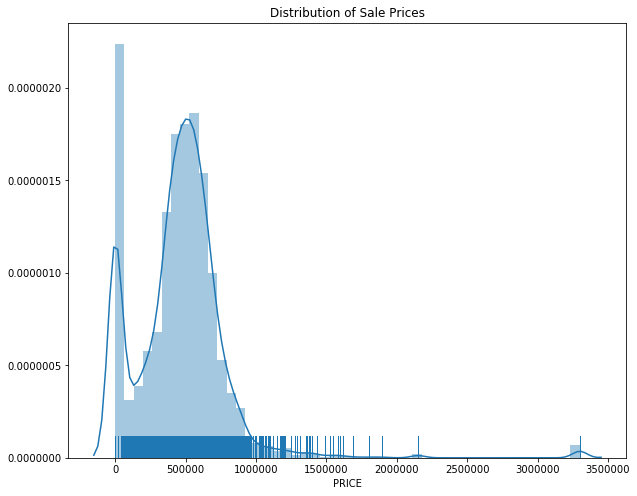

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
g = sns.distplot(condo_6.PRICE, rug=True, kde=True, ax=ax)
t = g.set_title("Distribution of Sale Prices")

It would also be interesting to understand the price based on the year the unit was last sold. We have the SALEDATE and can use that to group the sales prices by year in a [box plot](https://en.wikipedia.org/wiki/Box_plot). We don't have to create a separate column with the year data. As you can see below, we can manipulate the data we want to use as part of creating the plot.

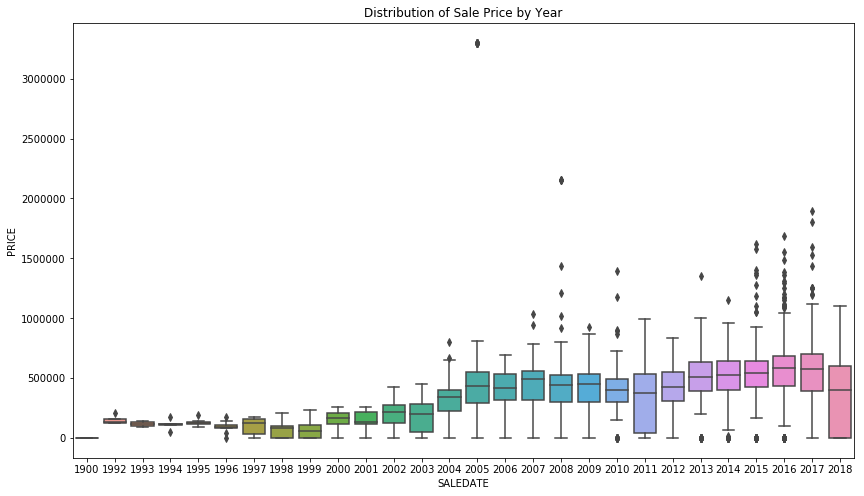

In [52]:
fig, ax = plt.subplots(figsize=(14,8))
g = sns.boxplot(y='PRICE', x=condo_6['SALEDATE'].dt.year, data=condo_6, ax=ax)
t = g.set_title("Distribution of Sale Price by Year")

Seaborn's joint plot allows you to view both a joint distribution and its marginals at once.

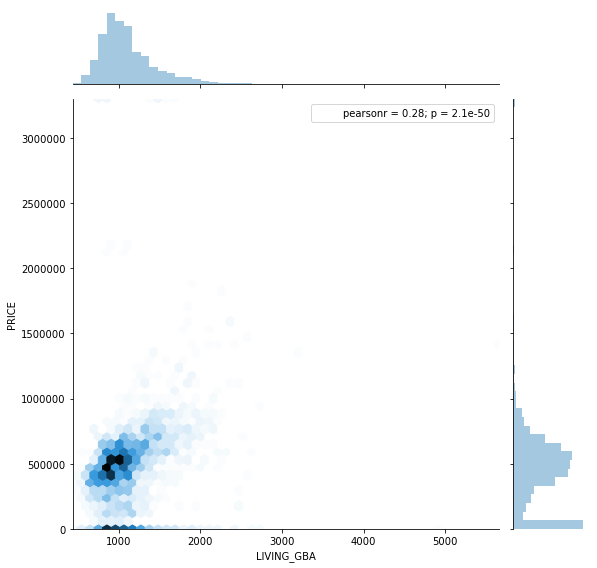

In [53]:
g = sns.jointplot(y="PRICE", x="LIVING_GBA", data=condo_6, kind="hex", size=8)

Since we intend to perform a regression with the data, we can also look at the correlations between our numeric variables in order to identify whether or not we have highly correlated variables. To do that, we will create (yet) another dataframe with the numerical variables. We can create a correlation matrix and provide that to the seaborn heatmap function to create a visual representation of correlation.

In [54]:
numerical = condo_6[list(set(condo_6.columns) - set(['SSL', 'SALEDATE', 'FULLADDRESS', 'UNITNUM']))]
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 192 to 19562
Data columns (total 17 columns):
ADDRESS_ID          2640 non-null int64
BLDG_NUM            2640 non-null int64
MAR_CENSUS_TRACT    2640 non-null int64
AYB                 2640 non-null int64
FIREPLACES          2640 non-null float64
BATHRM              2640 non-null float64
UNIT_ID             2640 non-null int64
AC                  2640 non-null object
BEDRM               2640 non-null float64
HF_BATHRM           2640 non-null float64
HEAT                2640 non-null float64
EYB                 2640 non-null int64
CMPLX_NUM           2640 non-null int64
HEAT_D              2640 non-null object
PRICE               2640 non-null float64
LIVING_GBA          2640 non-null int64
SALE_NUM            2640 non-null int64
dtypes: float64(6), int64(9), object(2)
memory usage: 451.2+ KB


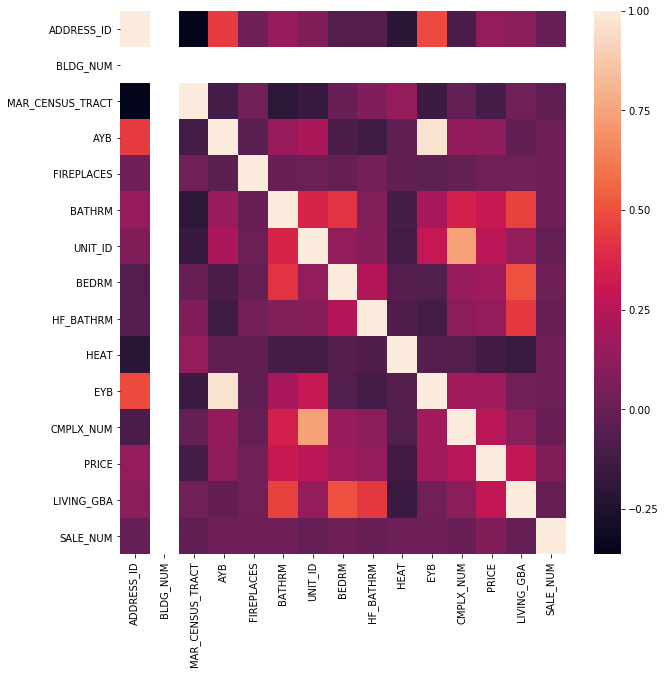

In [55]:
corr_matrix = numerical.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, ax=ax);

I hope you found this introduction to python for data science a useful starting point for getting started with open data for data science projects. If you explore an open data set from DC, use some in an analysis, or find the site useful in some way, [consider contributing](https://github.com/DCgov/opendatadc-starterkit/blob/master/CONTRIBUTING.md) to [opendatadc-starterkit](https://github.com/DCgov/opendatadc-starterkit).